In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
data = pd.read_csv('data/penguins_cleaned.csv')

In [160]:
data.corr()

,bill_length,bill_depth,flipper_length,body_mass,del15,del13
bill_length,1.000000,-0.235053,0.656181,0.595110,-0.059759,0.189025
bill_depth,-0.235053,1.000000,-0.583851,-0.471916,0.605874,0.429933
flipper_length,0.656181,-0.583851,1.000000,0.871202,-0.507787,-0.376223
body_mass,0.595110,-0.471916,0.871202,1.000000,-0.537888,-0.374638
del15,-0.059759,0.605874,-0.507787,-0.537888,1.000000,0.570615
del13,0.189025,0.429933,-0.376223,-0.374638,0.570615,1.000000


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   clutch_completion  342 non-null    object 
 3   date_egg           342 non-null    object 
 4   bill_length        342 non-null    float64
 5   bill_depth         342 non-null    float64
 6   flipper_length     342 non-null    float64
 7   body_mass          342 non-null    float64
 8   sex                342 non-null    object 
 9   del15              330 non-null    float64
 10  del13              331 non-null    float64
dtypes: float64(6), object(5)
memory usage: 29.5+ KB


## Convertion de types des variables

In [162]:
data.dtypes

species               object
island                object
clutch_completion     object
date_egg              object
bill_length          float64
bill_depth           float64
flipper_length       float64
body_mass            float64
sex                   object
del15                float64
del13                float64
dtype: object

In [163]:
for c in data.columns:
    if data[c].dtype == 'O':
        data[c] = data[c].astype('category')

# Analyse univariée

## Variables numériques

In [164]:
data.columns

Index(['species', 'island', 'clutch_completion', 'date_egg', 'bill_length',
       'bill_depth', 'flipper_length', 'body_mass', 'sex', 'del15', 'del13'],
      dtype='object')

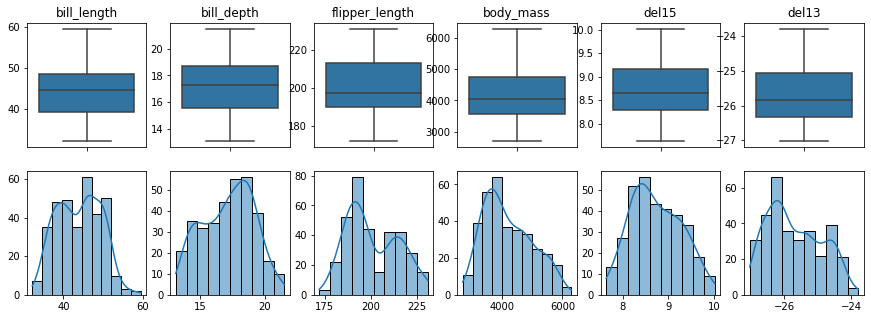

In [165]:
cols = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
fig1, axes1 = plt.subplots(ncols=len(cols), nrows=2,figsize=(15,5))
for i in range(len(cols)):
    sns.boxplot(y=data[cols[i]],ax=axes1[0,i],).set(ylabel=None,title=cols[i])
    sns.histplot(data[cols[i]],kde=True,ax=axes1[1,i],).set(xlabel=None,ylabel=None)

## Variables catégoriques

G:\References\BR\GI05\SY09\sy09\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


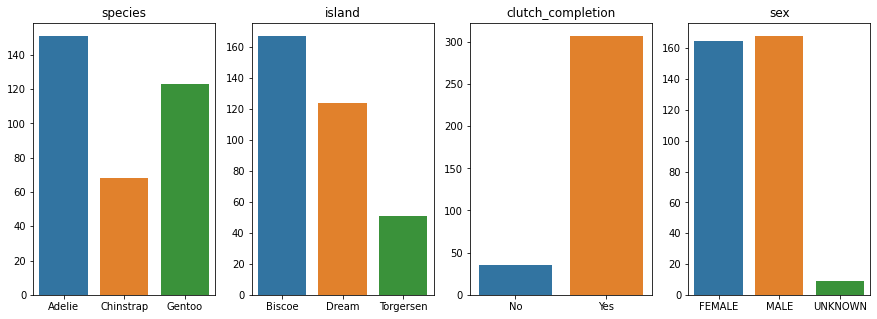

In [166]:
fig2, axes2 = plt.subplots(ncols=4, nrows=1,figsize=(15,5))
cols = ['species', 'island', 'clutch_completion','sex']
for i in range(len(cols)):
    sns.countplot(data[cols[i]],ax=axes2[i]).set(ylabel=None,xlabel=None,title=cols[i])

# Analyse multivariée

## Variables quantitatives

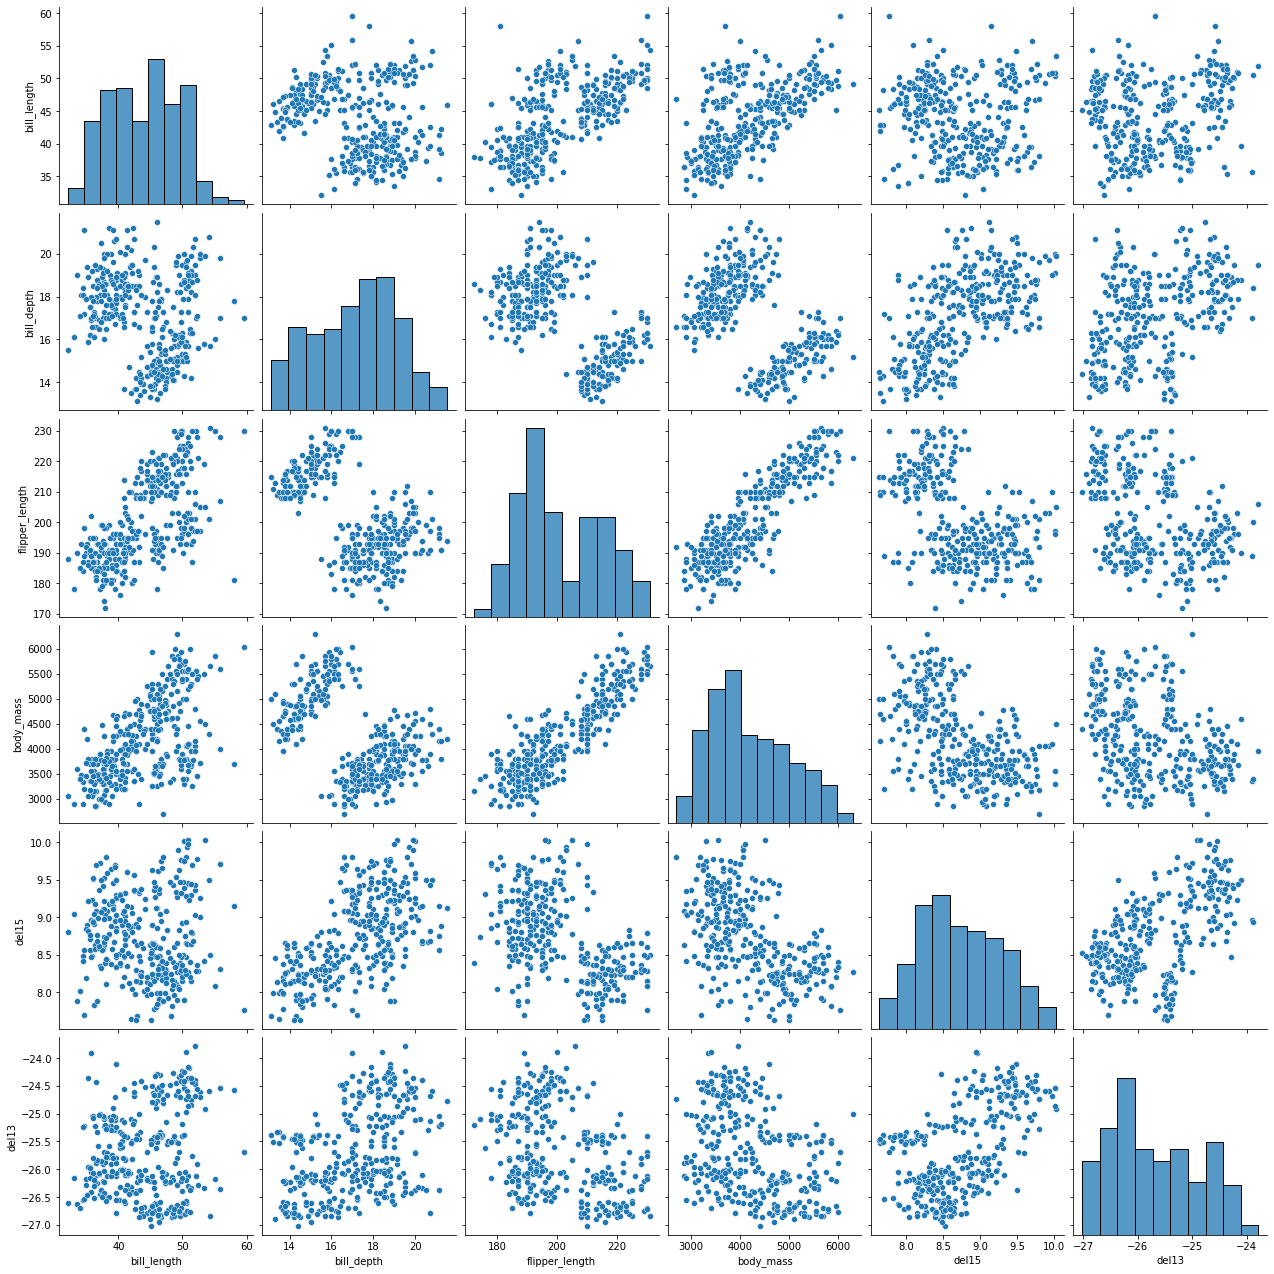

In [167]:
sns.pairplot(data,height=3)

<AxesSubplot:>

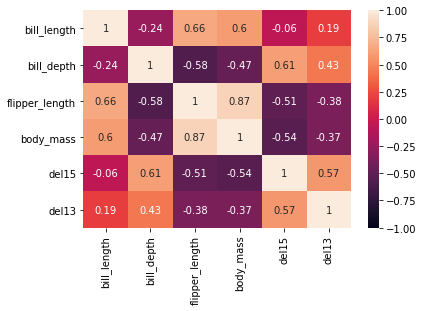

In [168]:
corr = data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

## Variables qualitatives

G:\References\BR\GI05\SY09\sy09\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


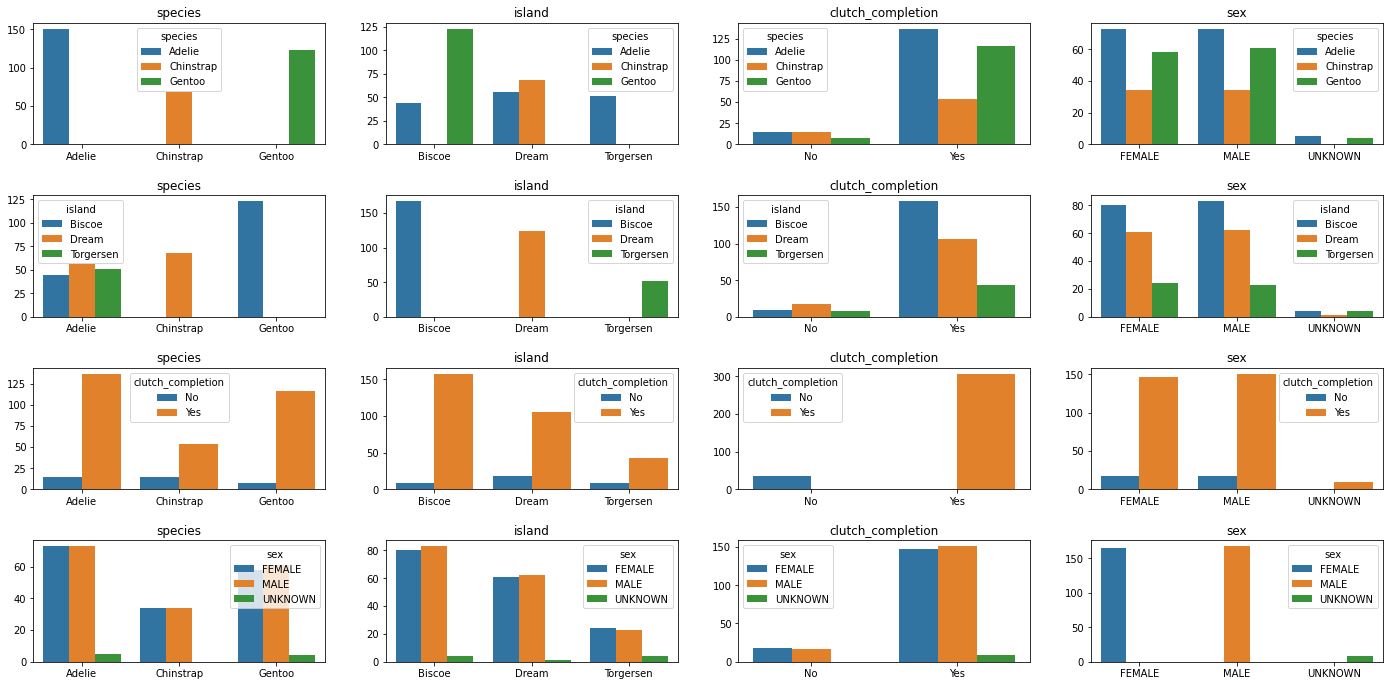

In [169]:
fig3, axes3 = plt.subplots(ncols=4, nrows=4,figsize=(20,10))
fig3.tight_layout(pad=3.0)
cols = ['species', 'island', 'clutch_completion','sex']
for i in range(len(cols)):
    for j in range(len(cols)):
        sns.countplot(data[cols[i]],ax=axes3[j,i],hue=data[cols[j]]).set(ylabel=None,xlabel=None,title=cols[i])

## Variables mixes

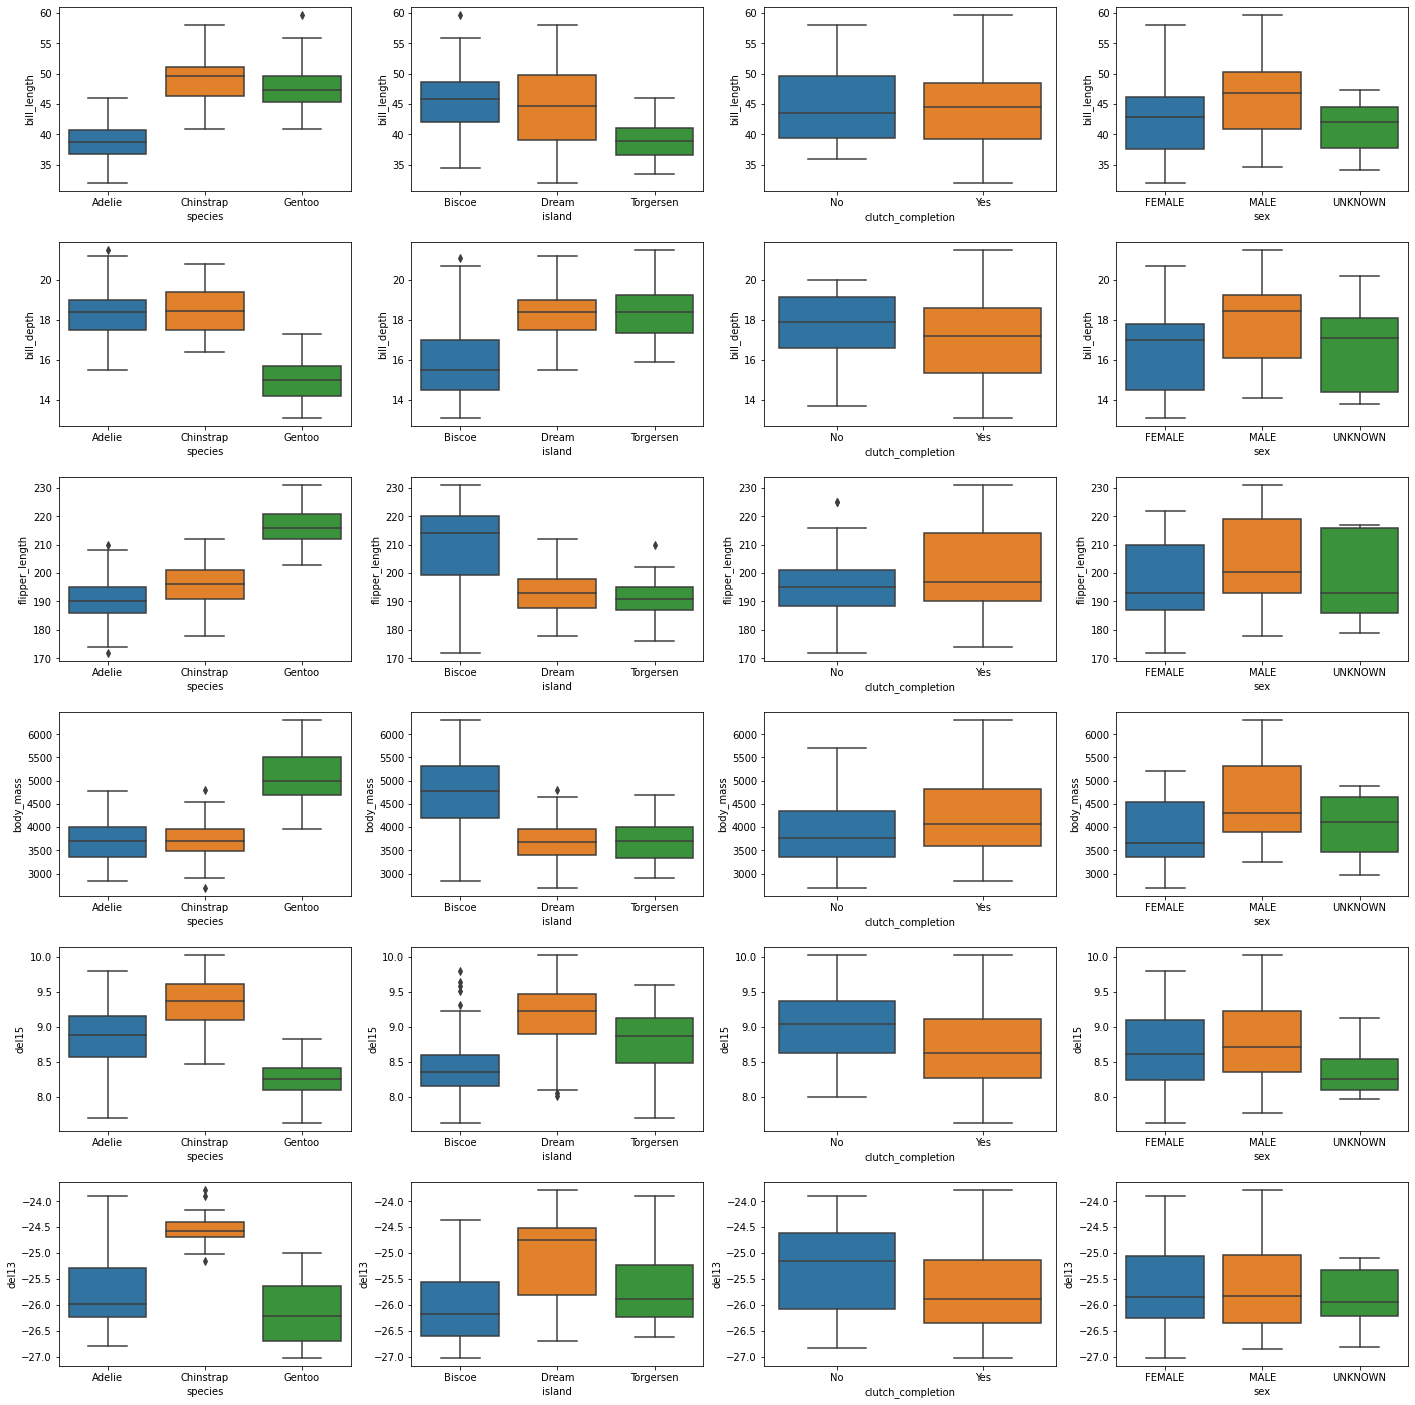

In [170]:
cols1 = ['species', 'island', 'clutch_completion','sex']
cols2 = ['bill_length','bill_depth', 'flipper_length', 'body_mass','del15', 'del13']
fig4, axes4 = plt.subplots(ncols=len(cols1), nrows=len(cols2),figsize=(20,20))
fig4.tight_layout(pad=3.0)

for i in range(len(cols1)):
    for j in range(len(cols2)):
        sns.boxplot(x=data[cols1[i]],y=data[cols2[j]],ax=axes4[j,i])

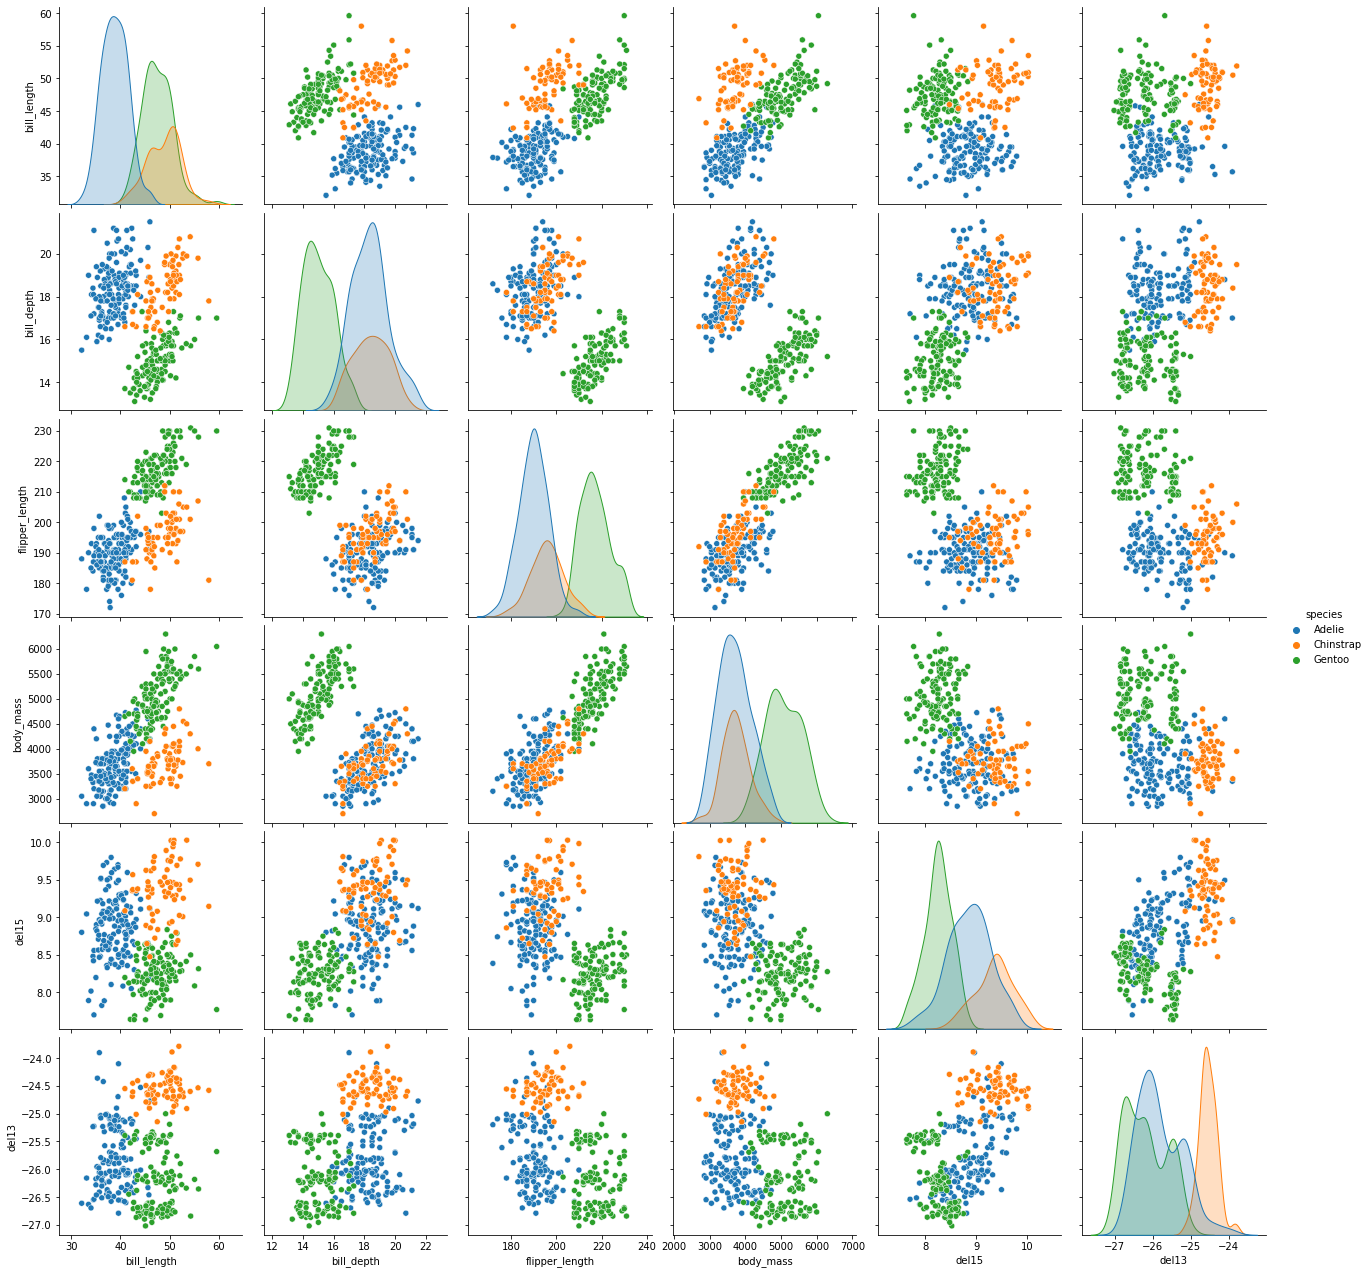

In [171]:
sns.pairplot(data,hue="species",height=3)

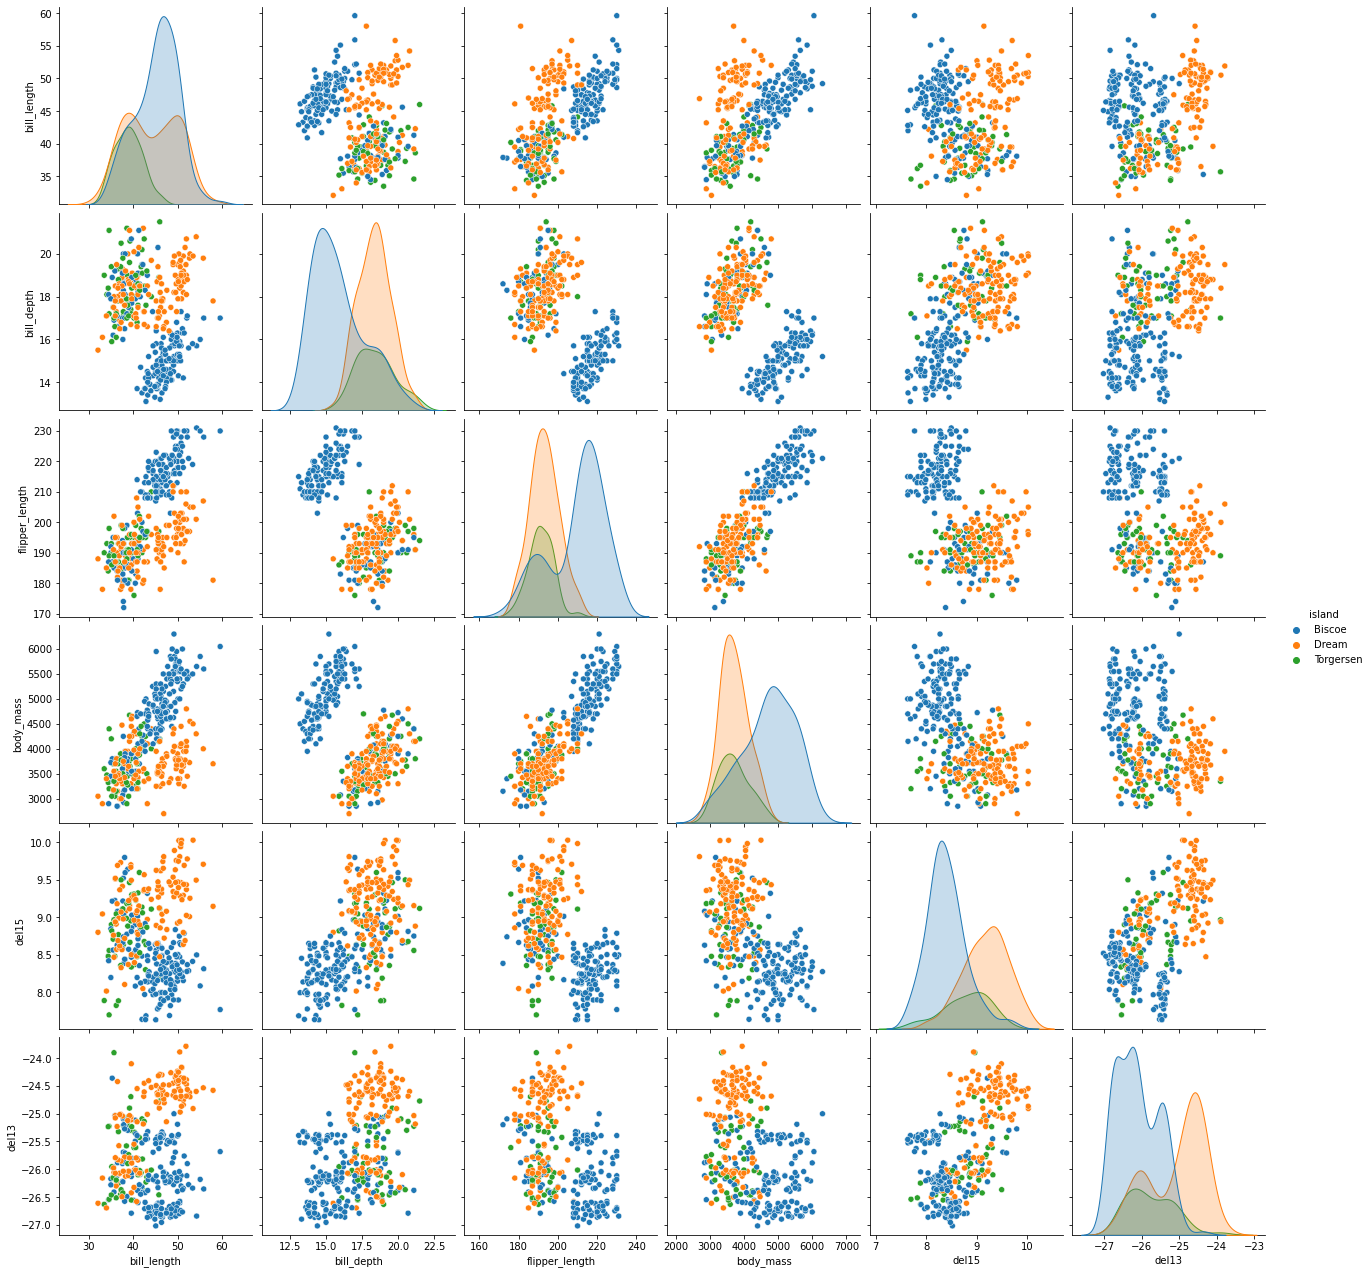

In [172]:
sns.pairplot(data,hue="island",height=3)

# Conclusion